In [124]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='x-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg

In [125]:
data = Table.read('T1T2L0cut1045.fits', format = 'fits' )

t1 = Table.read('T1L0cut1045.fits', format = 'ascii' )
t2 = Table.read('T2L0cut1045.fits', format = 'ascii' )

In [126]:
data.remove_columns(['col23_1','col24_1','col25_1','col26_1','col30_1','col31_1','col32_1','col33_1','col34_1','col35_1','col36_1','col37_1','col38_1','col39_1','col40_1','col41_1','col42_1','col43_1','col44_1','col45_1','col46_1','col47_1','col48_1'])

In [127]:
data.remove_columns(['col23_2','col24_2','col25_2','col26_2','col30_2','col31_2','col32_2','col33_2','col34_2','col35_2','col36_2','col37_2','col38_2','col39_2','col40_2','col41_2','col42_2','col43_2','col44_2','col45_2','col46_2','col47_2','col48_2'])

In [128]:
data

col1_1,col2_1,col3_1,col4_1,col5_1,col6_1,col7_1,col8_1,col9_1,col10_1,col11_1,col12_1,col13_1,col14_1,col15_1,col16_1,col17_1,col18_1,col19_1,col20_1,col21_1,col22_1,col27_1,col28_1,col29_1,col49_1,col1_2,col2_2,col3_2,col4_2,col5_2,col6_2,col7_2,col8_2,col9_2,col10_2,col11_2,col12_2,col13_2,col14_2,col15_2,col16_2,col17_2,col18_2,col19_2,col20_2,col21_2,col22_2,col27_2,col28_2,col29_2,col49_2,Separation
float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float64,float64,float64,float64,float64,float64
217.78476,32.37835,18.98,0.99,-99.99,12/0,0.01,113.7,0.0,-2.776,-2.7,1.65,26.69,2.622,1.588,0.0,0.796,14.04,0.05,169.69,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003,218.62884,33.01147,21.85,0.04,-99.99,11/0,3.0,36.15,0.0,2.513,1.327,1.66,1.87,2.563,0.0,1.478,0.0,55.98,0.5,82.74,1500K,46.143,46.092999999999996,43.58,44.907,1.6,0.22063036668667635
216.34027,32.37844,20.62,0.98,-99.99,12/0,2.07,38.5,0.0,0.3,2.091,1.8,3.64,2.064,1.332,0.0,0.0,39.35,0.02,74.26,a/f,45.644,43.879999999999995,43.58,45.671,0.064,217.33885,32.83504,22.69,0.03,-99.99,14/1,1.93,7.45,0.0,1.721,0.771,1.8,1.25,2.062,0.0,1.417,0.741,28.34,0.5,20.95,1500K,45.641999999999996,45.301,43.58,44.351,1.6,0.006666666666674814
217.72965,32.42403,21.67,0.97,-99.99,14/0,1.53,21.34,0.0,0.0,1.46,1.53,1.63,1.594,0.0,0.863,0.0,55.39,0.04,22.28,b/a,45.174,43.58,43.58,45.04,0.128,217.53778,34.37283,24.11,0.51,-99.99,15/1,1.89,1.57,0.0,1.401,-0.687,1.53,0.57,1.586,0.664,0.225,-0.028,11.53,0.63,3.83,1500K,45.166,44.981,43.58,42.893,2.016,0.02666666666667557
217.10787,32.42816,21.34,0.73,-99.99,14/0,0.04,9.9,0.0,-2.761,-2.26,1.71,0.46,1.727,0.723,0.0,0.0,93.95,0.01,10.78,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032,216.56367,33.63811,24.56,0.16,-99.99,14/0,1.84,3.16,0.0,1.32,0.0,1.71,1.03,1.74,0.0,0.995,-0.915,11.3,0.63,5.96,1500K,45.32,44.9,43.58,43.58,2.016,0.043333333333350765
218.17979,32.4394,19.36,0.73,-99.99,12/1,0.01,86.89,0.0,-2.714,-2.941,1.13,6.46,2.01,0.672,0.0,1.547,57.05,0.02,165.62,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064,217.58245,35.45128,21.78,0.04,-99.99,17/0,2.55,23.07,0.0,2.252,1.762,1.13,0.99,2.04,0.0,0.835,0.828,134.56,0.79,89.71,1500K,45.62,45.832,43.58,45.342,2.5280000000000005,0.10000000000000378
217.51987,32.44044,22.49,0.01,-99.99,14/0,1.76,2.56,0.0,1.537,0.665,1.45,0.61,1.648,0.948,0.0,0.0,16.8,0.25,8.31,1500K,45.228,45.117,43.58,44.245,0.8,219.05287,35.5919,22.9,0.28,-99.99,13/3,1.74,2.19,0.0,1.589,0.0,1.44,0.7,1.652,1.047,0.0,0.0,13.63,0.4,7.63,1500K,45.232,45.169,43.58,43.58,1.2800000000000002,0.10088487847195111
217.03198,32.44785,20.54,0.92,-99.99,13/0,0.01,31.15,0.0,-3.423,-3.132,1.6,2.02,1.979,0.0,0.0,1.371,58.54,0.03,57.67,a/f,45.559,40.157,43.58,40.448,0.096,218.09502,35.52384,24.43,0.48,-99.99,14/2,2.32,2.34,0.912,1.898,0.0,1.59,0.66,1.933,1.215,0.0,0.0,16.27,0.63,7.95,1500K,45.513,45.478,44.492,43.58,2.016,0.1830603508071402
216.24576,32.4713,21.51,0.78,-99.99,13/0,2.81,16.27,0.0,2.007,1.96,1.47,2.81,1.895,1.136,0.0,-0.266,20.19,0.25,58.99,1500K,45.475,45.586999999999996,43.58,45.54,0.8,217.45338,35.69917,22.09,0.02,-99.99,14/1,1.8,1.91,0.0,1.843,1.02,1.47,0.65,1.882,1.235,0.86,0.0,10.61,0.32,28.78,1500K,45.461999999999996,45.423,43.58,44.6,1.024,0.043333333333350765
218.12346,32.47383,19.39,0.98,-99.99,14/0,0.01,124.11,0.0,-3.087,-2.904,1.62,15.33,2.481,1.467,0.0,0.0,36.49,0.04,183.25,f/g,46.061,40.492999999999995,43.58,40.676,0.128,216.35915,34.8479,22.22,0.08,-99.99,15/0,2.81,25.47,0.0,2.325,1.53,1.62,2.13,2.454,0.997,0.0,0.954,55.87,0.63,53.91,1500K,46.034,45.905,43.58,45.11,2.016,0.09000000000000341


In [129]:
T1LMatched1045= data['col1_1','col2_1','col3_1','col4_1','col5_1','col6_1','col7_1','col8_1','col9_1','col10_1','col11_1','col12_1','col13_1','col14_1','col15_1','col16_1','col17_1','col18_1','col19_1','col20_1','col21_1','col22_1','col27_1','col28_1','col29_1','col49_1']
T2LMatched1045= data['col1_2','col2_2','col3_2','col4_2','col5_2','col6_2','col7_2','col8_2','col9_2','col10_2','col11_2','col12_2','col13_2','col14_2','col15_2','col16_2','col17_2','col18_2','col19_2','col20_2','col21_2','col22_2','col27_2','col28_2','col29_2','col49_2']

In [130]:
T1LMatched1045.rename_column('col1_1', 'RA')  
T1LMatched1045.rename_column('col2_1', 'Dec') 
T1LMatched1045.rename_column('col3_1', 'Imag') 
T1LMatched1045.rename_column('col4_1', 'S')  
T1LMatched1045.rename_column('col5_1', 'zspec') 
T1LMatched1045.rename_column('col6_1', 'N')  
T1LMatched1045.rename_column('col7_1', 'zG')  
T1LMatched1045.rename_column('col8_1', 'chi2G')  
T1LMatched1045.rename_column('col9_1', 'LEll')  
T1LMatched1045.rename_column('col10_1', 'LSbc') 
T1LMatched1045.rename_column('col11_1', 'LIrr')
T1LMatched1045.rename_column('col12_1', 'zGA') 
T1LMatched1045.rename_column('col13_1', 'chi2GA') 
T1LMatched1045.rename_column('col14_1', 'LAGNp') 
T1LMatched1045.rename_column('col15_1', 'LELLp') 
T1LMatched1045.rename_column('col16_1', 'LSbcp') 
T1LMatched1045.rename_column('col17_1', 'LIrrp') 
T1LMatched1045.rename_column('col18_1', 'F') 
T1LMatched1045.rename_column('col19_1', 'EBV') 
T1LMatched1045.rename_column('col20_1', 'Chi2S') 
T1LMatched1045.rename_column('col21_1', 'SType') 
T1LMatched1045.rename_column('col22_1', 'LAGNerg') 
T1LMatched1045.rename_column('col27_1', 'LSbcerg') 
T1LMatched1045.rename_column('col28_1', 'LEllerg') 
T1LMatched1045.rename_column('col29_1', 'LIrrerg') 
T1LMatched1045.rename_column('col49_1', 'AV') 





T2LMatched1045.rename_column('col1_2', 'RA')  
T2LMatched1045.rename_column('col2_2', 'Dec') 
T2LMatched1045.rename_column('col3_2', 'Imag') 
T2LMatched1045.rename_column('col4_2', 'S')  
T2LMatched1045.rename_column('col5_2', 'zspec') 
T2LMatched1045.rename_column('col6_2', 'N')  
T2LMatched1045.rename_column('col7_2', 'zG')  
T2LMatched1045.rename_column('col8_2', 'chi2G')  
T2LMatched1045.rename_column('col9_2', 'LEll')  
T2LMatched1045.rename_column('col10_2', 'LSbc') 
T2LMatched1045.rename_column('col11_2', 'LIrr')
T2LMatched1045.rename_column('col12_2', 'zGA') 
T2LMatched1045.rename_column('col13_2', 'chi2GA') 
T2LMatched1045.rename_column('col14_2', 'LAGNp') 
T2LMatched1045.rename_column('col15_2', 'LELLp') 
T2LMatched1045.rename_column('col16_2', 'LSbcp') 
T2LMatched1045.rename_column('col17_2', 'LIrrp') 
T2LMatched1045.rename_column('col18_2', 'F') 
T2LMatched1045.rename_column('col19_2', 'EBV') 
T2LMatched1045.rename_column('col20_2', 'Chi2S') 
T2LMatched1045.rename_column('col21_2', 'SType')
T2LMatched1045.rename_column('col22_2', 'LAGNerg') 
T2LMatched1045.rename_column('col27_2', 'LSbcerg') 
T2LMatched1045.rename_column('col28_2', 'LEllerg') 
T2LMatched1045.rename_column('col29_2', 'LIrrerg') 
T2LMatched1045.rename_column('col49_2', 'AV') 







In [131]:
T1LMatched1045

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV
float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float64,float64,float64,float64,float64
217.78476,32.37835,18.98,0.99,-99.99,12/0,0.01,113.7,0.0,-2.776,-2.7,1.65,26.69,2.622,1.588,0.0,0.796,14.04,0.05,169.69,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003
216.34027,32.37844,20.62,0.98,-99.99,12/0,2.07,38.5,0.0,0.3,2.091,1.8,3.64,2.064,1.332,0.0,0.0,39.35,0.02,74.26,a/f,45.644,43.879999999999995,43.58,45.671,0.064
217.72965,32.42403,21.67,0.97,-99.99,14/0,1.53,21.34,0.0,0.0,1.46,1.53,1.63,1.594,0.0,0.863,0.0,55.39,0.04,22.28,b/a,45.174,43.58,43.58,45.04,0.128
217.10787,32.42816,21.34,0.73,-99.99,14/0,0.04,9.9,0.0,-2.761,-2.26,1.71,0.46,1.727,0.723,0.0,0.0,93.95,0.01,10.78,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032
218.17979,32.4394,19.36,0.73,-99.99,12/1,0.01,86.89,0.0,-2.714,-2.941,1.13,6.46,2.01,0.672,0.0,1.547,57.05,0.02,165.62,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064
217.51987,32.44044,22.49,0.01,-99.99,14/0,1.76,2.56,0.0,1.537,0.665,1.45,0.61,1.648,0.948,0.0,0.0,16.8,0.25,8.31,1500K,45.228,45.117,43.58,44.245,0.8
217.03198,32.44785,20.54,0.92,-99.99,13/0,0.01,31.15,0.0,-3.423,-3.132,1.6,2.02,1.979,0.0,0.0,1.371,58.54,0.03,57.67,a/f,45.559,40.157,43.58,40.448,0.096
216.24576,32.4713,21.51,0.78,-99.99,13/0,2.81,16.27,0.0,2.007,1.96,1.47,2.81,1.895,1.136,0.0,-0.266,20.19,0.25,58.99,1500K,45.475,45.586999999999996,43.58,45.54,0.8
218.12346,32.47383,19.39,0.98,-99.99,14/0,0.01,124.11,0.0,-3.087,-2.904,1.62,15.33,2.481,1.467,0.0,0.0,36.49,0.04,183.25,f/g,46.061,40.492999999999995,43.58,40.676,0.128


In [132]:
T2LMatched1045

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV
float64,float64,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float64,float64,float64,float64,float64
218.62884,33.01147,21.85,0.04,-99.99,11/0,3.0,36.15,0.0,2.513,1.327,1.66,1.87,2.563,0.0,1.478,0.0,55.98,0.5,82.74,1500K,46.143,46.092999999999996,43.58,44.907,1.6
217.33885,32.83504,22.69,0.03,-99.99,14/1,1.93,7.45,0.0,1.721,0.771,1.8,1.25,2.062,0.0,1.417,0.741,28.34,0.5,20.95,1500K,45.641999999999996,45.301,43.58,44.351,1.6
217.53778,34.37283,24.11,0.51,-99.99,15/1,1.89,1.57,0.0,1.401,-0.687,1.53,0.57,1.586,0.664,0.225,-0.028,11.53,0.63,3.83,1500K,45.166,44.981,43.58,42.893,2.016
216.56367,33.63811,24.56,0.16,-99.99,14/0,1.84,3.16,0.0,1.32,0.0,1.71,1.03,1.74,0.0,0.995,-0.915,11.3,0.63,5.96,1500K,45.32,44.9,43.58,43.58,2.016
217.58245,35.45128,21.78,0.04,-99.99,17/0,2.55,23.07,0.0,2.252,1.762,1.13,0.99,2.04,0.0,0.835,0.828,134.56,0.79,89.71,1500K,45.62,45.832,43.58,45.342,2.5280000000000005
219.05287,35.5919,22.9,0.28,-99.99,13/3,1.74,2.19,0.0,1.589,0.0,1.44,0.7,1.652,1.047,0.0,0.0,13.63,0.4,7.63,1500K,45.232,45.169,43.58,43.58,1.2800000000000002
218.09502,35.52384,24.43,0.48,-99.99,14/2,2.32,2.34,0.912,1.898,0.0,1.59,0.66,1.933,1.215,0.0,0.0,16.27,0.63,7.95,1500K,45.513,45.478,44.492,43.58,2.016
217.45338,35.69917,22.09,0.02,-99.99,14/1,1.8,1.91,0.0,1.843,1.02,1.47,0.65,1.882,1.235,0.86,0.0,10.61,0.32,28.78,1500K,45.461999999999996,45.423,43.58,44.6,1.024
216.35915,34.8479,22.22,0.08,-99.99,15/0,2.81,25.47,0.0,2.325,1.53,1.62,2.13,2.454,0.997,0.0,0.954,55.87,0.63,53.91,1500K,46.034,45.905,43.58,45.11,2.016


In [133]:
#problem with log plot is i think av is 0 in some instances
#doesn't matter just need to plot the luminosty histogram and the redshift histogram and then run the stats tests. 

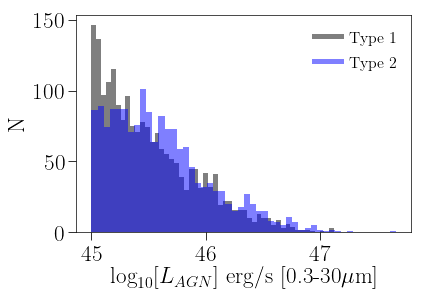

In [134]:
plt.hist(t1['LAGNerg'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
plt.hist(t2['LAGNerg'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
plt.xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m] ')
plt.ylabel('N')
plt.xlim
plt.legend(frameon=False, loc=1)


In [135]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(t1['LAGNerg'],t2['LAGNerg'] )
AD = anderson_ksamp([t1['LAGNerg'],t2['LAGNerg']])

from scipy import special
sigma = special.erfcinv(AD[2])*np.sqrt(2)
print (AD)
print (KS)
print ("Sigma:", sigma)

Anderson_ksampResult(statistic=29.39346867793621, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=5.674826957181991e-05)
Ks_2sampResult(statistic=0.1106940346004745, pvalue=3.7797847251094307e-10)
Sigma: 4.025939540748837


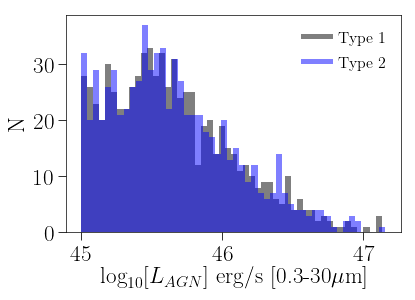

In [136]:

plt.hist(T1LMatched1045['LAGNerg'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
plt.hist(T2LMatched1045['LAGNerg'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
plt.xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m] ')
plt.ylabel('N')
plt.legend(frameon=False, loc=1)



In [137]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(T1LMatched1045['LAGNerg'],T2LMatched1045['LAGNerg'] )
AD = anderson_ksamp([T1LMatched1045['LAGNerg'],T2LMatched1045['LAGNerg']])

from scipy import special
sigma = special.erfcinv(AD[2])*np.sqrt(2)
print (AD)
print (KS)
print ("Sigma:", sigma)

Anderson_ksampResult(statistic=-1.2608501142539443, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.3453090909772005)
Ks_2sampResult(statistic=0.01091405184174632, pvalue=0.9999999999908173)
Sigma: -0.4472550624057258


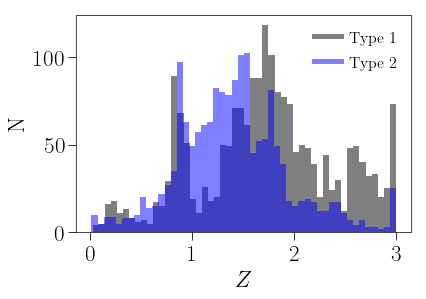

In [138]:
plt.hist(t1['zGA'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
plt.hist(t2['zGA'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
plt.xlabel(r'$ Z$')
plt.ylabel('N')
plt.legend(frameon=False, loc=1)



In [139]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(t1['zGA'],t2['zGA'] )
AD = anderson_ksamp([t1['zGA'],t2['zGA']])

from scipy import special
sigma = special.erfcinv(AD[2])*np.sqrt(2)
print (AD)
print (KS)
print ("Sigma:", sigma)

Anderson_ksampResult(statistic=198.77077936330755, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)
Ks_2sampResult(statistic=0.3081749406931667, pvalue=8.623714901435486e-76)
Sigma: -inf


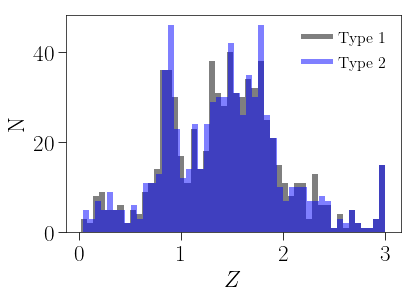

In [140]:
plt.hist(T1LMatched1045['zGA'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
plt.hist(T2LMatched1045['zGA'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
plt.xlabel(r'$ Z$')
plt.ylabel('N')
plt.legend(frameon=False, loc=1)



In [141]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(T1LMatched1045['zGA'],T2LMatched1045['zGA'] )
AD = anderson_ksamp([T1LMatched1045['zGA'],T2LMatched1045['zGA']])

from scipy import special
sigma = special.erfcinv(AD[2])*np.sqrt(2)
print (AD)
print (KS)
print ("Sigma:", sigma)

Anderson_ksampResult(statistic=-1.301339046657482, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=1.4068684120259882)
Ks_2sampResult(statistic=0.009549795361528002, pvalue=0.9999999999999981)
Sigma: -0.5343034755968025


In [142]:
from astropy.io import ascii
ascii.write(T1LMatched1045, 'T1LMatched1045.fits', overwrite=True, comment = False, format = 'no_header')
#agn luminosity is 0 removed and cut 1045 for T1 after luminosity match

In [143]:
from astropy.io import ascii
ascii.write(T2LMatched1045, 'T2LMatched1045.fits', overwrite=True, comment = False, format = 'no_header')
#agn luminosity is 0 removed and cut 1045 for T2 after luminosity match 

In [144]:
from astropy.io import ascii
ascii.write(T1LMatched1045, 'T1LMatched1045.ecsv', overwrite=True)
#agn luminosity is 0 removed and cut 1045 for T1 after luminosity match

In [145]:
from astropy.io import ascii
ascii.write(T2LMatched1045, 'T2LMatched1045.ecsv', overwrite=True)
#agn luminosity is 0 removed and cut 1045 for T2 after luminosity match 

In [146]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt

vertices1 = []
codes1 = []
codes1 = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices1 = [(1.85, 126), (1.85, 146), (3.1, 146), (3.1, 126),(0,0)]
path1 = Path(vertices1, codes1)
pathpatch1 = PathPatch(path1, facecolor='gray', edgecolor='black', alpha = 0.1)

vertices2= []
codes2= []
codes2= [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices2= [(1.85, 39), (1.85, 45), (3.1, 45), (3.1, 39),(0,0)]
path2= Path(vertices2, codes2)
pathpatch2= PathPatch(path2, facecolor='gray', edgecolor='black', alpha = 0.1)

vertices3 = []
codes3 = []
codes3 = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices3 = [(46.25, 126), (46.25, 146), (47.25, 146), (47.25, 126),(0,0)]
path3 = Path(vertices3 , codes3 )
pathpatch3 = PathPatch(path3 , facecolor='gray', edgecolor='black', alpha = 0.1)

vertices4 = []
codes4 = []
codes4 = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices4 = [(46.25, 39), (46.25, 45), (47.25, 45), (47.25, 39),(0,0)]
path4 = Path(vertices4 , codes4 )
pathpatch4 = PathPatch(path4 , facecolor='gray', edgecolor='black', alpha = 0.1)

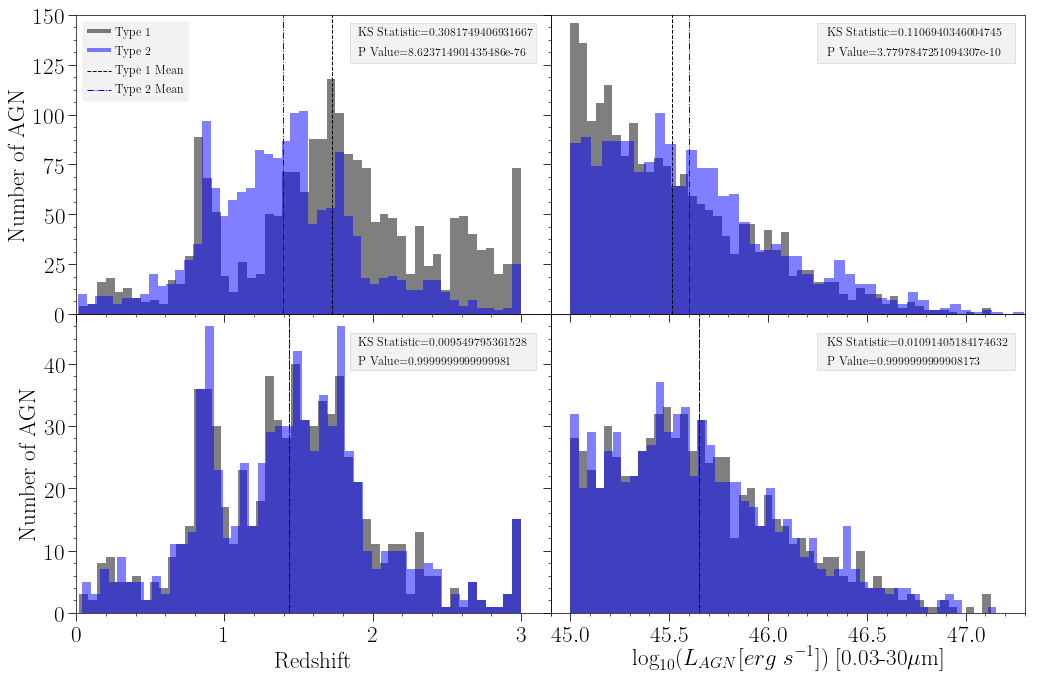

In [147]:
fig = plt.figure(figsize=(17,11))
gs = GridSpec(nrows=2,ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax1.minorticks_on()
ax1.hist(t1['zGA'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
ax1.hist(t2['zGA'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
ax1.vlines(1.724300595238095,0,155, linestyle = 'dashed', color='black', label = 'Type 1 Mean')
ax1.vlines(1.3959173754556502,0,155, linestyle = '-.', color='blue', label = 'Type 2 Mean')
ax1.set_xlim(0,3.2)
ax1.set_ylabel('Number of AGN')
ax1.set_ylim(0, 150)
ax1.text(1.9,140, 'KS Statistic=0.3081749406931667', fontweight = 1000, fontsize = 12)
ax1.text(1.9,130, 'P Value=8.623714901435486e-76', fontweight = 1000, fontsize = 12)
ax1.add_patch(pathpatch1)
ax1.legend(fontsize='12', loc =2,frameon = True, framealpha=0.1, facecolor = 'gray')




ax2 = fig.add_subplot(gs[1,0], sharex = ax1)
ax2.minorticks_on()
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.hist(T1LMatched1045['zGA'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
ax2.hist(T2LMatched1045['zGA'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
#ax2.tick_params(which='both', direction='in', top="on", right='on')
ax2.vlines(1.4338336,0,155, linestyle = 'dashed', color='black', label = 'Type 1 Mean')
ax2.vlines(1.4341338,0,155, linestyle = '-.', color='blue', label = 'Type 2 Mean')
ax2.set_xlabel('Redshift')
ax2.set_ylabel('Number of AGN')
ax2.set_ylim(0, 48)
ax2.set_xlim(0,3.2)
ax2.text(1.9,43, 'KS Statistic=0.009549795361528', fontweight = 1000, fontsize = 12)
ax2.text(1.9,40, 'P Value=0.9999999999999981', fontweight = 1000, fontsize = 12)
ax2.add_patch(pathpatch2)

ax3 = fig.add_subplot(gs[0,1], sharey = ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.hist(t1['LAGNerg'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
ax3.hist(t2['LAGNerg'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
ax3.vlines(45.51636011904761,0,155, linestyle = 'dashed', color='black', label = 'Type 1 Mean')
ax3.vlines(45.6028304981774,0,155, linestyle = '-.', color='blue', label = 'Type 2 Mean')
ax3.minorticks_on()
ax3.set_xlim(44.9,47.3)
ax3.set_ylim(0, 150)
ax3.text(46.3,140, 'KS Statistic=0.1106940346004745', fontweight = 1000, fontsize = 12)
ax3.text(46.3,130, 'P Value=3.7797847251094307e-10', fontweight = 1000, fontsize = 12)
ax3.add_patch(pathpatch3)



ax4 = fig.add_subplot(gs[1,1], sharex = ax3, sharey = ax2)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.minorticks_on()
ax4.hist(T1LMatched1045['LAGNerg'],bins=50, histtype ='bar', color = 'black', density=False, lw=1, label="Type 1", log=False, alpha = 0.5 )
ax4.hist(T2LMatched1045['LAGNerg'],bins=50, histtype ='bar', color = 'blue', density=False, lw=1, label="Type 2", log=False, alpha = 0.5 )
ax4.vlines(45.650762619372436,0,155, linestyle = 'dashed', color='black', label = 'Type 1 Mean')
ax4.vlines(45.65089085948158,0,155, linestyle = '-.', color='blue', label = 'Type 2 Mean')
ax4.set_xlabel(r'$ \log_{10}(L_{AGN}[erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax4.set_xlim(44.9,47.3)
ax4.set_ylim(0, 48)
ax4.text(46.3,43, 'KS Statistic=0.01091405184174632', fontweight = 1000, fontsize = 12)
ax4.text(46.3,40, 'P Value=0.9999999999908173', fontweight = 1000, fontsize = 12)
ax4.add_patch(pathpatch4)

plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace =.0)
plt.savefig('Figure7.png')


In [148]:
np.mean(t1['LAGNerg'])

45.51636011904761

In [149]:
np.mean(t2['LAGNerg'])

45.6028304981774

In [150]:
np.mean(T1LMatched1045['LAGNerg'])

45.650762619372436

In [151]:
np.mean(T2LMatched1045['LAGNerg'])

45.65089085948158

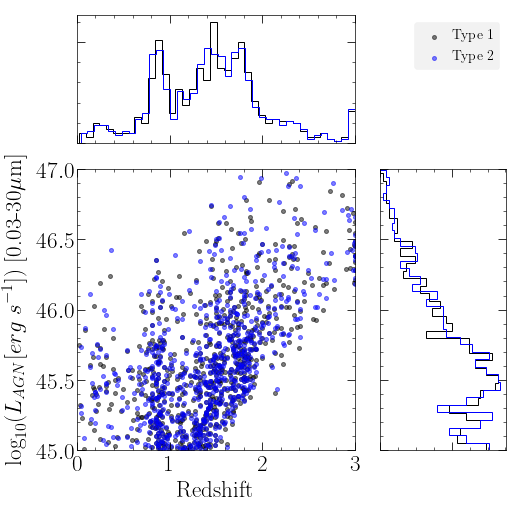

In [153]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatched1045['zGA'],T1LMatched1045['LAGNerg'], color = 'black', label = 'Type 1', alpha = 0.5)
ax.scatter(T2LMatched1045['zGA'],T2LMatched1045['LAGNerg'], color = 'blue', label = 'Type 2', alpha = 0.5)
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
#plt.plot(x,y, color = 'magenta', label = 'X=Y')
plt.vlines(45, 40, 50, colors = 'black', linestyles='dashed')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}(L_{AGN}[erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax.set_xlabel(r'Redshift')
ax.set_xlim(0, 3)
ax.set_ylim(45,47)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels,fontsize='14',frameon = True, framealpha=0.1, facecolor = 'gray')

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T1LMatched1045['zGA'],bins=40, histtype ='step', color = 'black', density=False, lw=1, label="x", log=False)
ax.hist(T2LMatched1045['zGA'],bins=40, histtype ='step', color = 'blue', density=False, lw=1, label="x", log=False)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(0, 3)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T1LMatched1045['LAGNerg'],bins=40, orientation='horizontal', histtype ='step', color = 'black', density=False, lw=1, label="x", log=False)
ax.hist(T2LMatched1045['LAGNerg'],bins=40, orientation='horizontal', histtype ='step', color = 'blue', density=False, lw=1, label="x", log=False )
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(45,47)
#ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)
plt.savefig('Figure8.png')
